In [1]:
# !python -m pip install tables pyarrow --upgrade
# !pip install polars

In [2]:
import pandas as pd
import os
import numpy as np
import pyarrow
import torch
from my_plot import Plotter
import matplotlib.pyplot as plt
import numpy.linalg as la

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [3]:
from table import Table
from blackbox import BlackBox

In [4]:
np.random.seed(23)
torch.manual_seed(23+7)

In [5]:

if __name__ == "__main__":
    # address = "raw_points/wood/rs-70_pcds/1717020290-942984619/3/wood_rs-70_pcds_1717020290-942984619_172_1.npz"
    

    address = os.path.join('C:\\', 'GitHub', 'ransac_tomato', 'Archive2', 'raw_points', 'synthetic', 'normal_noise', '0_0.2100.npz')
    # address = 'C:/GitHub/ransac_tomato/Archive2/raw_points/synthetic/normal_noise/0_0.2100.npz'

    # volume, semiaxis, confine
    scale_corrections = {
    "polygon": (1e-6, 1, 100),
    "wood": (1e-6, 1., 100.),
    "synthetic": (1, 1., 1.)
    }

    main_variables = {
        "sphere_resolution": 5000,
        "n_iterations": 10000
    }

    hyperparameters = {
        "threshold": 0.1,
        "confine_coeff": 5,
        "h": 3,
        "method": "count",
    }




In [6]:
blackbox = BlackBox(address = address, main_variables=main_variables, scale_correction= scale_corrections["synthetic"])
blackbox.fit()

df = Table(blackbox=blackbox, hyperparameters=hyperparameters, main_variables=main_variables, debug=True).prepare()


import polars as pl
# df = df.dropna()
df = df.filter(pl.col("rejected") == 0)
df.head(20)

res_new torch.Size([10000, 5000, 1]) torch.float32
distances torch.Size([10000, 5000, 1]) torch.float32
tensor([[[  0.2549],
         [  0.0738],
         [  0.1102],
         ...,
         [  0.0579],
         [ -0.4045],
         [ -0.3672]],

        [[  0.7866],
         [  2.7087],
         [  1.6203],
         ...,
         [  0.8627],
         [ -0.9516],
         [  1.4676]],

        [[ -9.2979],
         [-25.4926],
         [-10.7802],
         ...,
         [-14.2090],
         [ -7.7534],
         [  0.2244]],

        ...,

        [[  0.0518],
         [  0.5473],
         [  0.6164],
         ...,
         [  0.5647],
         [ -0.4501],
         [  1.1142]],

        [[-29.7244],
         [  4.1363],
         [-20.6875],
         ...,
         [-33.2227],
         [-11.5835],
         [ -0.2606]],

        [[ -2.1895],
         [ -1.5081],
         [ -1.8527],
         ...,
         [ -2.3838],
         [ -1.4270],
         [ -0.5225]]])
mask torch.Size([10000, 5000])

shape: (20, 50)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ hyp_a     ┆ hyp_b     ┆ hyp_c     ┆ hyp_d     ┆ … ┆ water_vol ┆ rejected ┆ inlier_va ┆ ransac_it │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ume       ┆ ---      ┆ lue       ┆ eration   │
│ f64       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ u8       ┆ ---       ┆ ---       │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆          ┆ f64       ┆ u16       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ 1.074448  ┆ 0.643991  ┆ 1.398682  ┆ -0.197119 ┆ … ┆ 0.0       ┆ 0        ┆ 145.0     ┆ 5         │
│ 0.380453  ┆ 0.262278  ┆ 0.559427  ┆ -0.059162 ┆ … ┆ 0.0       ┆ 0        ┆ 320.0     ┆ 7         │
│ 1.788792  ┆ 1.218198  ┆ 1.271768  ┆ -0.594161 ┆ … ┆ 0.0       ┆ 0        ┆ 200.0     ┆ 14        │
│ 0.843544  ┆ 0.217339  ┆ 0.629918  ┆ -0.000992 ┆ … ┆ 0.0       ┆ 0        ┆ 212.0     ┆ 15        │
│ 1.056991  ┆ 0.408228  ┆ 0.325011  ┆ -0.203636 ┆ … ┆ 0.0       ┆ 0        ┆ 320.0     ┆ 24        │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …        ┆ …         ┆ …         │
│ 1.351149  ┆ 0.778267  ┆ 1.035943  ┆ -0.417994 ┆ … ┆ 0.0       ┆ 0        ┆ 219.0     ┆ 77        │
│ 4.314252  ┆ 1.408543  ┆ 1.710795  ┆ -1.202343 ┆ … ┆ 0.0       ┆ 0        ┆ 116.0     ┆ 81        │
│ 3.184182  ┆ 1.710208  ┆ 2.187279  ┆ -1.224094 ┆ … ┆ 0.0       ┆ 0        ┆ 118.0     ┆ 104       │
│ -5.641117 ┆ -3.941521 ┆ -4.9903   ┆ 1.363345  ┆ … ┆ 0.0       ┆ 0        ┆ 59.0      ┆ 107       │
│ -3.327151 ┆ -1.298556 ┆ -1.227659 ┆ 1.204863  ┆ … ┆ 0.0       ┆ 0        ┆ 146.0     ┆ 118       │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴──────────┴───────────┴───────────┘

In [7]:
df.describe()

shape: (9, 51)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ statistic ┆ hyp_a     ┆ hyp_b     ┆ hyp_c     ┆ … ┆ water_vol ┆ rejected ┆ inlier_va ┆ ransac_it │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ume       ┆ ---      ┆ lue       ┆ eration   │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ f64      ┆ ---       ┆ ---       │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆          ┆ f64       ┆ f64       │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ count     ┆ 1810.0    ┆ 1810.0    ┆ 1810.0    ┆ … ┆ 1810.0    ┆ 1810.0   ┆ 1810.0    ┆ 1810.0    │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0      ┆ 0.0       ┆ 0.0       │
│ t         ┆           ┆           ┆           ┆   ┆           ┆          ┆           ┆           │
│ mean      ┆ -1.101973 ┆ -0.103639 ┆ -0.927563 ┆ … ┆ 0.0       ┆ 0.0      ┆ 237.62596 ┆ 5083.6033 │
│           ┆           ┆           ┆           ┆   ┆           ┆          ┆ 7         ┆ 15        │
│ std       ┆ 55.686198 ┆ 33.506886 ┆ 45.019498 ┆ … ┆ 0.0       ┆ 0.0      ┆ 173.09969 ┆ 2919.1846 │
│           ┆           ┆           ┆           ┆   ┆           ┆          ┆ 2         ┆ 66        │
│ min       ┆ -1780.273 ┆ -984.6989 ┆ -1527.433 ┆ … ┆ 0.0       ┆ 0.0      ┆ 9.0       ┆ 5.0       │
│           ┆ 438       ┆ 75        ┆ 96        ┆   ┆           ┆          ┆           ┆           │
│ 25%       ┆ -0.370542 ┆ -0.234783 ┆ -0.341471 ┆ … ┆ 0.0       ┆ 0.0      ┆ 107.0     ┆ 2625.0    │
│ 50%       ┆ 0.6663    ┆ 0.437196  ┆ 0.492579  ┆ … ┆ 0.0       ┆ 0.0      ┆ 205.0     ┆ 5083.0    │
│ 75%       ┆ 1.399106  ┆ 0.908719  ┆ 1.0578    ┆ … ┆ 0.0       ┆ 0.0      ┆ 335.0     ┆ 7633.0    │
│ max       ┆ 461.51959 ┆ 761.44628 ┆ 411.35284 ┆ … ┆ 0.0       ┆ 0.0      ┆ 1354.0    ┆ 10000.0   │
│           ┆ 2         ┆ 9         ┆ 4         ┆   ┆           ┆          ┆           ┆           │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴──────────┴───────────┴───────────┘

In [8]:
# 26 = 0-9 equation coefs
# 10-12 - center
# 13-15 - radii
# 16-24 - rotation
# 25 - rejection (>0 for rejected, 0 for accepted)
blackbox.get_predictions()[0]

tensor([ 2.6004e-01,  1.7427e-01, -2.4522e-01, -3.6736e-01,  5.5347e-02,
        -1.8142e-01, -7.7618e-01, -6.2677e-02, -1.3345e+00,  1.0000e+00,
         2.7333e-01, -1.1369e+00, -1.8183e+00,  6.5880e-01,  1.1972e+00,
         1.0000e-10,  2.0699e-01,  6.6493e-01,  7.1765e-01,  4.6190e-01,
         5.8022e-01, -6.7082e-01,  8.6244e-01, -4.7033e-01,  1.8703e-01,
         1.0000e+00])

In [9]:
# accepted
np.where(blackbox.get_predictions()[:, -1] == 0)

(array([   4,    6,   13, ..., 9995, 9998, 9999], dtype=int64),)

In [10]:
best_ind = np.argmax(df['iou'])
best_ind

1649

In [11]:
df.to_pandas().iloc[best_ind]['iou']

0.8813115358352661

In [12]:
# True
T = blackbox.tomato.center
S = np.diag(blackbox.tomato.semiaxis)
R = blackbox.tomato.rotation

In [13]:
# 26 = 0-9 equation coefs
# 10-12 - center
# 13-15 - radii
# 16-24 - rotation
# 25 - rejection (>0 for rejected, 0 for accepted)

index = -1 + best_ind
prediction = blackbox.get_predictions()[index]

T_pred = np.array(prediction[10:13])
S_pred = np.diag(prediction[13:16])
R_pred = np.array(prediction[16:25].reshape((3, 3)))

In [14]:
hypothesis = blackbox.get_predictions()[index][:10]
hypothesis

tensor([ 0.2030,  0.2780,  0.0154, -0.0631, -0.0215, -0.0392, -0.2936,  0.4390,
        -0.3317,  1.0000])

In [15]:
from my_plot import Plotter

plotter = Plotter()
plotter.plot_ellipsoid(S, R.T, T, name='True', alpha=0.6)
plotter.plot_ellipsoid(S_pred, R_pred.T, T_pred, name='predicted', alpha=0.5)

plotter.plot_points(blackbox.tomato.points.T, alpha=0.7, size=0.5, name='true')

plotter.show()

In [16]:
df.to_pandas().iloc[best_ind]['iou']

0.8813115358352661

In [17]:
df.to_pandas().describe()

hyp_a        hyp_b        hyp_c        hyp_d        hyp_e  \
count  1810.000000  1810.000000  1810.000000  1810.000000  1810.000000   
mean     -1.101973    -0.103639    -0.927563     0.018113     0.748374   
std      55.686198    33.506886    45.019498    14.909090    24.567662   
min   -1780.273438  -984.698975 -1527.433960  -172.082062   -90.793243   
25%      -0.366974    -0.233831    -0.339434    -0.464615    -0.408236   
50%       0.664263     0.436968     0.492298    -0.158800    -0.111237   
75%       1.398016     0.907676     1.057729     0.120144     0.164898   
max     461.519592   761.446289   411.352844   461.293152   844.253296   

             hyp_f        hyp_g        hyp_h        hyp_i   hyp_j  tomato_id  \
count  1810.000000  1810.000000  1810.000000  1810.000000  1810.0     1810.0   
mean     -0.029076     3.456585     0.312870    -4.090102     1.0        0.0   
std       8.460828   136.830436    75.506840   138.974844     0.0        0.0   
min    -259.174774  -753.218994 -2009.853516 -4878.136719     1.0        0.0   
25%      -0.176947    -3.039137    -0.716772    -1.158700     1.0        0.0   
50%      -0.060698    -1.191809     0.826985     1.075788     1.0        0.0   
75%       0.045491     0.860493     2.041959     2.753818     1.0        0.0   
max     233.735092  4559.613770  1999.045044   524.608398     1.0        0.0   

       confine_coeff            K       h  threshold  sphere_resolution  \
count         1810.0  1810.000000  1810.0     1810.0             1810.0   
mean             5.0     6.231286     3.0        0.1             5000.0   
std              0.0     0.000000     0.0        0.0                0.0   
min              5.0     6.231286     3.0        0.1             5000.0   
25%              5.0     6.231286     3.0        0.1             5000.0   
50%              5.0     6.231286     3.0        0.1             5000.0   
75%              5.0     6.231286     3.0        0.1             5000.0   
max              5.0     6.231286     3.0        0.1             5000.0   

               iou  intersect_volume  intersect_point_count  pred_volume  \
count  1810.000000       1810.000000            1810.000000  1810.000000   
mean      0.450153         25.727845            3391.837017    51.797698   
std       0.241363         11.584868            1429.415959    30.562370   
min       0.011650          1.555856             199.000000    16.771713   
25%       0.207944         12.863701            2262.250000    38.286721   
50%       0.508641         31.300840            4059.500000    44.845758   
75%       0.650234         34.869926            4462.750000    55.656412   
max       0.881312         39.029301            4992.000000   530.053345   

            pred_x       pred_y       pred_z       pred_a       pred_b  \
count  1810.000000  1810.000000  1810.000000  1810.000000  1810.000000   
mean      0.399489    -1.005551    -1.181760     2.925861     2.272813   
std       0.537956     0.490574     0.492455     1.117827     0.402182   
min      -4.992906    -3.890372    -5.483487     0.888836     1.348241   
25%       0.196863    -1.225535    -1.387174     1.604325     2.021756   
50%       0.395273    -1.007467    -1.187708     3.157948     2.212395   
75%       0.590760    -0.784228    -0.983153     3.571551     2.453122   
max       4.457304     2.260652     2.209222     8.256319     6.544706   

            pred_c   pred_rot_x   pred_rot_y   pred_rot_z   pred_rot_w  \
count  1810.000000  1810.000000  1810.000000  1810.000000  1810.000000   
mean      2.037959     0.380383     0.163564     0.166571     0.215890   
std       0.846255     0.482337     0.373550     0.460503     0.412755   
min       0.902327    -0.681148    -0.689972    -0.626086    -0.673663   
25%       1.447981    -0.047070    -0.098315    -0.201876    -0.011160   
50%       1.629240     0.324609     0.176662    -0.005086     0.179688   
75%       2.760892     0.861336     0.400893     0.649406     0.487748   
max  

In [18]:
from ellipsoid import ELLIPSOID
import torch

synth_ellip = ELLIPSOID(
                                params = [T, np.diag(S), R], 
                                points = None, 
                                fill = True, 
                                resolution=10**4,
                                dev=torch.device('cpu')
                            )

from ellipsoid import ELLIPSOID
import torch

synth_ellip_pred = ELLIPSOID(
                                params = [T_pred, np.diag(S_pred), R_pred], 
                                points = None, 
                                fill = True, 
                                resolution=10**4,
                                dev=torch.device('cpu')
                            )


In [19]:
plotter = Plotter()

plotter.plot_ellipsoid(S_pred, R_pred.T, T_pred, name='predicted', alpha=0.5)
plotter.plot_points(synth_ellip_pred.points.T, alpha=0.3, size=0.5)
plotter.plot_ellipsoid(S, R.T, T, name='True', alpha=0.6)
plotter.plot_points(synth_ellip.points.T, alpha=0.7, size=0.5)

plotter.show()

In [20]:
plotter = Plotter()
plotter.plot_ellipsoid(S, R.T, T, name='True', alpha=0.6)
plotter.plot_points(synth_ellip.points.T, alpha=0.7, size=0.5)


plotter.show()

In [21]:
plotter = Plotter()

plotter.plot_ellipsoid(S_pred, R_pred.T, T_pred, name='predicted', alpha=0.5)
plotter.plot_points(synth_ellip_pred.points.T, alpha=0.3, size=0.5)

plotter.show()

In [22]:
true_sur_points = plotter.gen_ellipse_points(S, R.T, T).reshape((3, -1)).T
true_sur_points

array([[-1.33338491, -3.20460633, -2.59743751],
       [-1.33338491, -3.20460633, -2.59743751],
       [-1.33338491, -3.20460633, -2.59743751],
       ...,
       [ 2.13338491,  1.20460633,  0.19743751],
       [ 2.13338491,  1.20460633,  0.19743751],
       [ 2.13338491,  1.20460633,  0.19743751]])

In [23]:
plotter = Plotter()
plotter.plot_ellipsoid(S, R.T, T, name='True', alpha=0.6)
# plotter.plot_ellipsoid(S_pred, R_pred.T, T_pred, name='predicted', alpha=0.5)

plotter.plot_points(true_sur_points.T, alpha=0.7, size=0.5)

plotter.show()

In [24]:
def subs_point(point, hypothesis):
    x, y, z = point
    pt = np.array([x**2, y**2, z**2, 2*x*y, 2*x*z, 2*y*z, x, y, z, -1])

    return pt @ np.array(hypothesis)

def subs_points(points, hypothesis):
    results = np.zeros(len(points))
    for i, point in enumerate(points):
        results[i] = subs_point(point, hypothesis)

    return results

In [25]:
def M_m(R, S, T):

    M = R.T @ la.inv(S)**2 @ R
    m = (-2) * T @ R.T @ la.inv(S)**2 @ R
    m_ = 1 - T @ R.T @ la.inv(S)**2 @ R @ T

    M /= m_
    m /= m_

    return M, m

def calc_hyp(R, S, T):
    M, m = M_m(R.T, S, T)

    return np.array([M[0, 0], M[1, 1], M[2, 2], M[0, 1], M[0, 2], M[1, 2], *m, 1])



In [26]:
true_hyp = calc_hyp(R, S, T)
true_hyp

array([ 2.29314475e+00,  1.30083861e+00,  1.52737750e+00, -8.46991402e-01,
       -7.20093241e-01,  7.57062107e-04, -5.25672238e+00,  3.28108729e+00,
        4.24329473e+00,  1.00000000e+00])

(array([  4.,  39., 104., 348., 524., 736., 449., 276.,  86.,  26.]),
 array([-7.10542736e-15, -5.75095527e-15, -4.39648318e-15, -3.04201109e-15,
        -1.68753900e-15, -3.33066907e-16,  1.02140518e-15,  2.37587727e-15,
         3.73034936e-15,  5.08482145e-15,  6.43929354e-15]),
 <BarContainer object of 10 artists>)

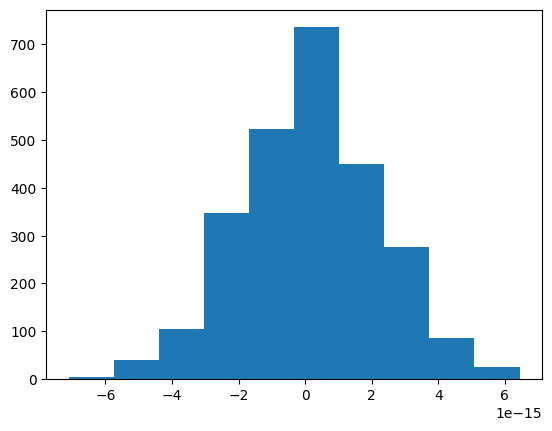

In [27]:
buf = subs_points(true_sur_points, true_hyp)

plt.hist(buf)

(array([ 314.,  582.,  733.,  897.,  987., 1105., 1202., 1272., 1403.,
        1505.]),
 array([-6.23529194e+00, -5.61179232e+00, -4.98829271e+00, -4.36479309e+00,
        -3.74129348e+00, -3.11779386e+00, -2.49429425e+00, -1.87079464e+00,
        -1.24729502e+00, -6.23795409e-01, -2.95794633e-04]),
 <BarContainer object of 10 artists>)

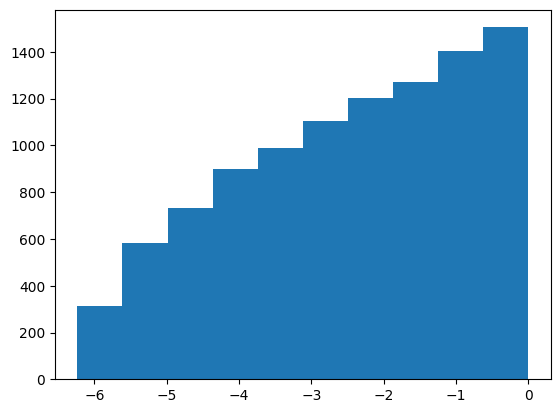

In [28]:
buf = subs_points(synth_ellip.points, true_hyp)

plt.hist(buf)

(array([ 311.,  572.,  770.,  881., 1043., 1115., 1262., 1299., 1377.,
        1370.]),
 array([-5.72847151e+00, -5.15567101e+00, -4.58287051e+00, -4.01007001e+00,
        -3.43726952e+00, -2.86446902e+00, -2.29166852e+00, -1.71886803e+00,
        -1.14606753e+00, -5.73267030e-01, -4.66533090e-04]),
 <BarContainer object of 10 artists>)

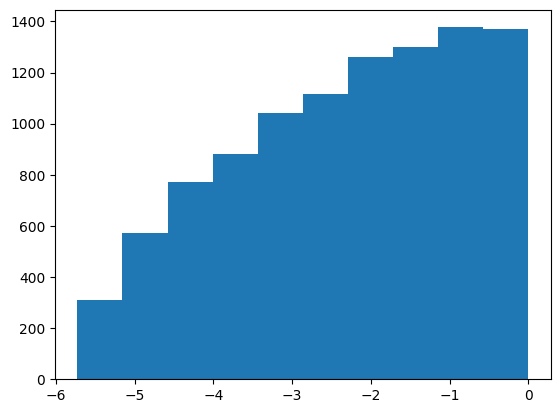

In [29]:
buf = subs_points(synth_ellip_pred.points, hypothesis)

plt.hist(buf)

(array([ 311.,  572.,  770.,  881., 1043., 1115., 1262., 1299., 1377.,
        1370.]),
 array([-5.72847151e+00, -5.15567101e+00, -4.58287051e+00, -4.01007001e+00,
        -3.43726952e+00, -2.86446902e+00, -2.29166852e+00, -1.71886803e+00,
        -1.14606753e+00, -5.73267030e-01, -4.66533090e-04]),
 <BarContainer object of 10 artists>)

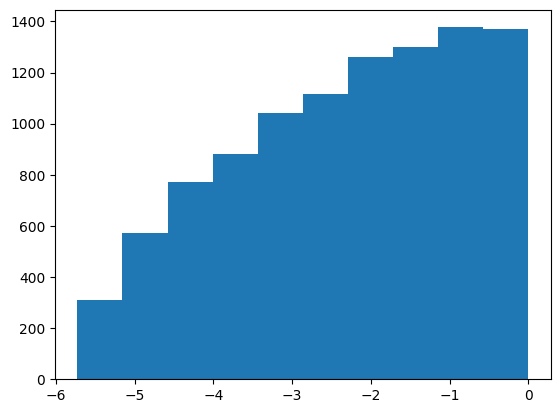

In [30]:
buf = subs_points(synth_ellip_pred.points, hypothesis)

plt.hist(buf)

In [31]:
# A U B = A + B - A^B

In [32]:
# A^B / A U B

In [33]:
def count_in(points, hypothesis):
    buf = subs_points(points, hypothesis)

    return np.sum(buf < 0) / len(buf)

In [34]:
A = synth_ellip.points
B = synth_ellip_pred.points

A_hyp = true_hyp
B_hyp = hypothesis

In [35]:
count_in(B, B_hyp)

1.0

In [36]:
count_in(A, A_hyp)

1.0

In [46]:
count_in(A, B_hyp)

0.7998

In [48]:
count_in(B, A_hyp)

0.0083

: 

In [39]:
calc_hyp(R_pred, S_pred, T_pred)

array([ 0.20302598,  0.27799842,  0.01544927, -0.06306311, -0.02154955,
       -0.0391998 , -0.29359758,  0.43902409, -0.33173811,  1.        ])

In [40]:
np.array(hypothesis)

array([ 0.20302607,  0.27799878,  0.01544927, -0.06306315, -0.02154956,
       -0.03919981, -0.293598  ,  0.4390219 , -0.33173785,  1.        ],
      dtype=float32)

In [41]:
count_in(B, hypothesis)

1.0

In [42]:
count_in(A, A_hyp)

1.0

In [43]:
calc_hyp(R_pred, S_pred, T_pred)

array([ 0.20302598,  0.27799842,  0.01544927, -0.06306311, -0.02154955,
       -0.0391998 , -0.29359758,  0.43902409, -0.33173811,  1.        ])

(array([ 311.,  572.,  770.,  881., 1043., 1115., 1262., 1299., 1377.,
        1370.]),
 array([-5.72847151e+00, -5.15567101e+00, -4.58287051e+00, -4.01007001e+00,
        -3.43726952e+00, -2.86446902e+00, -2.29166852e+00, -1.71886803e+00,
        -1.14606753e+00, -5.73267030e-01, -4.66533090e-04]),
 <BarContainer object of 10 artists>)

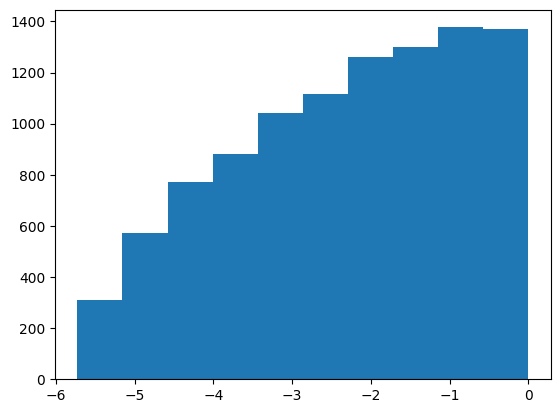

In [44]:
buf = subs_points(synth_ellip_pred.points, hypothesis)

plt.hist(buf)

(array([ 6.,  6., 12., 28., 22., 33., 22., 25., 36., 27., 20., 20., 19.,
        22., 30., 23., 27., 22., 14.,  6., 10., 11., 13., 13., 17., 12.,
        15., 11., 12.,  9.,  6.,  7.,  4.,  5.,  9., 13.,  5.,  9., 19.,
        10.,  9., 10., 14.,  6., 17., 16., 10., 12., 14., 15., 18., 18.,
        26., 23., 20., 22., 22., 28., 26., 24., 24., 17., 22., 29., 24.,
        32., 41., 32., 21., 22., 34., 28., 31., 37., 21., 31., 35., 21.,
        25., 23., 30., 26., 31., 25., 22., 18., 24., 18., 14., 12., 15.,
         8.,  9., 10.,  8.,  5.,  2.,  2.,  0.,  1.]),
 array([0.01165003, 0.02034665, 0.02904326, 0.03773988, 0.04643649,
        0.05513311, 0.06382972, 0.07252634, 0.08122295, 0.08991957,
        0.09861618, 0.1073128 , 0.11600941, 0.12470603, 0.13340264,
        0.14209926, 0.15079587, 0.15949249, 0.1681891 , 0.17688572,
        0.18558233, 0.19427895, 0.20297556, 0.21167218, 0.22036879,
        0.22906541, 0.23776202, 0.24645864, 0.25515525, 0.26385187,
        0.27254848, 0.2812

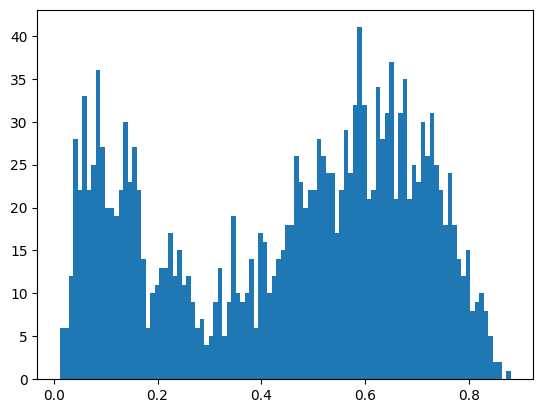

In [45]:
plt.hist(df['iou'].to_numpy(), bins=100)